In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.model_selection import train_test_split    # train, test 데이터 분할
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier # 로지스틱 회귀 분석 / 선형 분류
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [16]:
X, y = load_iris(return_X_y=True)
# print(X)
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

m = GaussianNB()
# m = BernoulliNB()

m.fit(X_train, y_train)

print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
print('test target', y_test)

print(m.class_count_)
print(m.class_prior_)
print(m.predict_proba(X_test))

train score :  0.9464285714285714
test score :  1.0
test pred :  [1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
test target [1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
[38. 37. 37.]
[0.33928571 0.33035714 0.33035714]
[[1.03551337e-081 9.97663173e-001 2.33682708e-003]
 [2.95168784e-079 9.99647721e-001 3.52278999e-004]
 [1.55082683e-143 4.29751129e-002 9.57024887e-001]
 [6.67343309e-199 5.06131720e-006 9.99994939e-001]
 [6.34898932e-227 1.03232615e-009 9.99999999e-001]
 [1.62783858e-087 9.98233380e-001 1.76662013e-003]
 [1.00000000e+000 1.01896956e-019 5.79526041e-024]
 [1.13141994e-275 1.34536146e-012 1.00000000e+000]
 [1.17037178e-213 4.46425560e-007 9.99999554e-001]
 [1.00000000e+000 4.06642028e-020 3.49368190e-024]
 [1.37179093e-101 9.81659122e-001 1.83408776e-002]
 [3.04755816e-075 9.99586394e-001 4.13605988e-004]
 [4.44687886e-033 9.99995934e-001 4.06607837e-006]
 [5.92371125e-097 9.86635629e-001 1.33643709e-002]
 [

In [17]:
# raisin 데이터
# naive bayes 분류기
# 4개 feature 사용, random_state = 10, MinMaxScaler 적용 전, 후 score 값 비교
# RocCurve 그리기

In [18]:
# raisin 데이터 가공
pd_data = pd.read_csv('Raisin_Dataset.CSV')

X = pd_data.iloc[:, [0,1,3,6]]

print(X)

enc = LabelEncoder()
y = enc.fit_transform(pd_data['Class'])

print(y)

      Area  MajorAxisLength  Eccentricity  Perimeter
0    87524       442.246011      0.819738   1184.040
1    75166       406.690687      0.801805   1121.786
2    90856       442.267048      0.798354   1208.575
3    45928       286.540559      0.684989    844.162
4    79408       352.190770      0.564011   1073.251
..     ...              ...           ...        ...
895  83248       430.077308      0.817263   1129.072
896  87350       440.735698      0.808629   1214.252
897  99657       431.706981      0.721684   1292.828
898  93523       476.344094      0.845739   1258.548
899  85609       512.081774      0.907345   1272.862

[900 rows x 4 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

--------MinMaxScaler() 적용 전--------
train_score 0.84
test_score 0.8355555555555556
recall_score 0.8849557522123894
--------MinMaxScaler() 적용 후--------
train_score 0.8577777777777778
test_score 0.8533333333333334
recall_score 0.8938053097345132


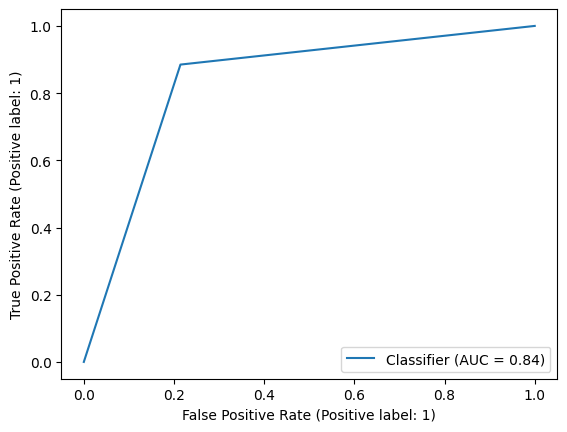

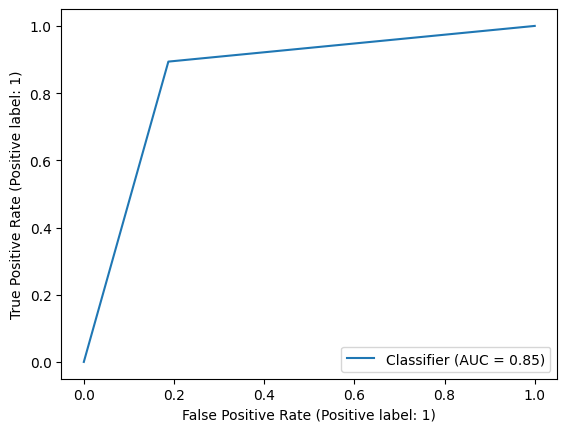

In [19]:
# naive bayes 분류기

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

m = GaussianNB()
m.fit(X_train, y_train)

# 4개 feature 사용, random_state = 10, MinMaxScaler 적용 전
print("--------MinMaxScaler() 적용 전--------")
print('train_score', m.score(X_train, y_train))
print('test_score', m.score(X_test, y_test))
print('recall_score', metrics.recall_score(y_test, m.predict(X_test)))
# RocCurve 그리기
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))


# 4개 feature 사용, random_state = 10, MinMaxScaler 적용 후
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

m = GaussianNB()
m.fit(X_train, y_train)

print("--------MinMaxScaler() 적용 후--------")
print('train_score', m.score(X_train, y_train))
print('test_score', m.score(X_test, y_test))
print('recall_score', metrics.recall_score(y_test, m.predict(X_test)))
# RocCurve 그리기
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

In [20]:
# sklearn.datasets.load_breast_cancer
# naive bayes 분류기 vs LogisticRegression
# Naive bayes와 LogisticRegression 예측값이 다른 샘플이 있는가?
# random_state = 10, RocCurve 그리기
# 가장 높은 확률로 Malignant 예측되는 X_test 샘플은 어느 것인가

In [21]:
d = load_breast_cancer()

print(d.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

-------Naive Bayes--------
train score :  0.9483568075117371
test score :  0.916083916083916
test pred :  [1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0]
test target [1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0]
precision : 0.8979591836734694

-------LogisticRegression--------
train score :  0.960093896713615
test score :  0.9370629370629371
test pred :  [1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 

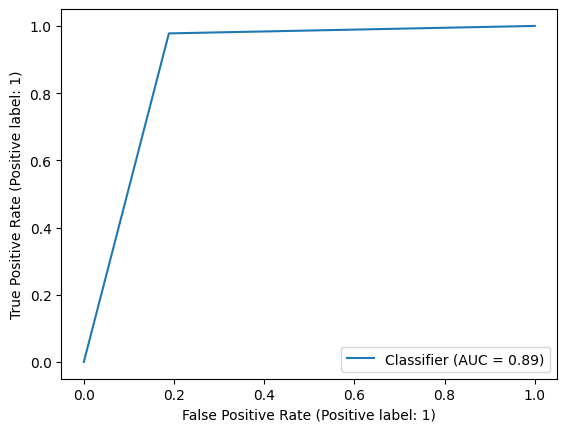

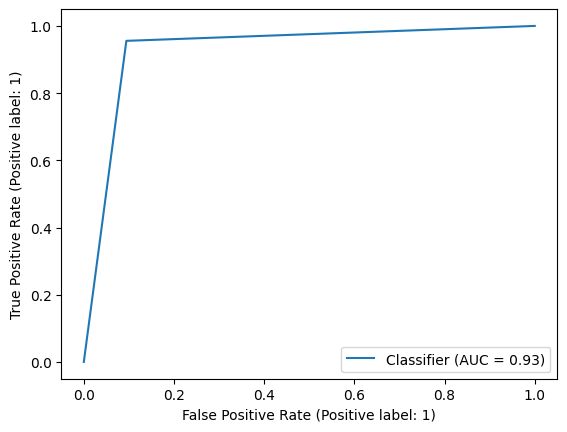

In [22]:
X, y = load_breast_cancer(return_X_y=True)

# print(X)
# print(y)
# print(np.unique(y,return_counts=True))  # 0 : Malignant

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)


# Naive bayes
m = GaussianNB().fit(X_train, y_train)

print('-------Naive Bayes--------')
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
naive_x = m.predict(X_test)
print('test target', y_test)
print('precision :', metrics.precision_score(y_test, m.predict(X_test)))
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

# LogisticRegression
m = LogisticRegression(solver='liblinear').fit(X_train, y_train)

print('\n-------LogisticRegression--------')
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
logistic_x = m.predict(X_test)
print('test target', y_test)
print('precision :', metrics.precision_score(y_test, m.predict(X_test)))
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

filter_x = naive_x != logistic_x

print("\n--------예측값 차이----------")
# print(filter_x)
print("예측값이 다른 샘플 개수 : ", np.count_nonzero(filter_x))

In [23]:
print("diff count ", np.sum((naive_x - logistic_x)**2))
print("total count ", len(logistic_x))

diff count  9
total count  143
